In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st
import seaborn as sns
%matplotlib inline


In [3]:
health = "Resources/2.12_Health_systems.csv"
happiness16 = "Resources/2016.csv"

health_df = pd.read_csv(health)
happiness16_df = pd.read_csv(happiness16)

In [4]:
health_df

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,US,Virgin Islands,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN
207,NaN,NaN,"Yemen, Rep.",5.6,10.2,81.0,72.0,144.5,7.8,0.3,0.7,0.8,30.7,NaN
208,Zambia,NaN,Zambia,4.5,38.3,12.1,56.5,175.2,42.5,0.1,0.9,1.5,11.3,NaN


In [5]:
health_rename = health_df.rename(columns = {"Country_Region" : "Country", 
                                            "Health_exp_pct_GDP_2016" : "Health Expenditure % - GDP",         
                                            "Health_exp_public_pct_2016": "Health Expenditure Public %", 
                                            "Health_exp_out_of_pocket_pct_2016" : "Health EXP Out of Pocket %", 
                                            "External_health_exp_pct_2016" : "External Health Expenditure %", 
                                            "Physicians_per_1000_2009-18" : "Physicians per 1000",
                                            "Nurse_midwife_per_1000_2009-18" : "Nurse Midwife per 1000",
                                            "Specialist_surgical_per_1000_2008-18" : "Specialist Surgical per 1000",
                                            "Completeness_of_birth_reg_2009-18" : "Completeness of Birth Reg",
                                            "Completeness_of_death_reg_2008-16" : "Completeness of Death Reg", 
                                            "per_capita_exp_PPP_2016" : "Per Capita Expeniture by PPP",                       
                                            "Health_exp_per_capita_USD_2016" : "Health Expenditure Per Capita($)"
                                            })


In [6]:
happiness16_df.rename(columns = {'Country':'Country'})
happiness16_df

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [7]:
merged_dfs = pd.merge(happiness16_df, health_rename, on ='Country', how ='left')
merged_dfs

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Health Expenditure Public %,Health EXP Out of Pocket %,Health Expenditure Per Capita($),Per Capita Expeniture by PPP,External Health Expenditure %,Physicians per 1000,Nurse Midwife per 1000,Specialist Surgical per 1000,Completeness of Birth Reg,Completeness of Death Reg
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,...,84.1,13.7,5565.6,5093.0,NaN,4.5,10.3,69.0,100.0,98.0
1,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,...,62.8,29.6,9836.0,7867.4,NaN,4.2,17.3,94.8,100.0,100.0
4,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,...,81.5,16.9,5063.6,4245.1,0.0,4.0,15.7,101.6,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,...,20.5,43.5,30.4,83.5,30.5,0.2,0.6,1.9,85.6,NaN
164,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,...,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
165,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,...,20.0,50.4,38.8,99.9,20.7,0.0,0.3,0.5,78.0,NaN
166,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,...,NaN,NaN,NaN,NaN,NaN,1.2,1.5,NaN,NaN,92.0


In [8]:
dropped_dup_merged_dfs = merged_dfs.drop_duplicates(subset =['Country'], keep = 'first').reset_index(drop= True)
dropped_dup_merged_dfs

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Health Expenditure Public %,Health EXP Out of Pocket %,Health Expenditure Per Capita($),Per Capita Expeniture by PPP,External Health Expenditure %,Physicians per 1000,Nurse Midwife per 1000,Specialist Surgical per 1000,Completeness of Birth Reg,Completeness of Death Reg
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,...,84.1,13.7,5565.6,5093.0,NaN,4.5,10.3,69.0,100.0,98.0
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,...,62.8,29.6,9836.0,7867.4,NaN,4.2,17.3,94.8,100.0,100.0
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,...,81.5,16.9,5063.6,4245.1,0.0,4.0,15.7,101.6,100.0,100.0
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,...,85.1,14.5,7477.9,6203.5,0.0,4.6,18.1,67.2,100.0,100.0
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,...,77.4,20.4,4117.3,4112.1,0.0,3.8,14.7,76.3,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,...,20.5,43.5,30.4,83.5,30.5,0.2,0.6,1.9,85.6,NaN
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,...,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,...,20.0,50.4,38.8,99.9,20.7,0.0,0.3,0.5,78.0,NaN
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,...,NaN,NaN,NaN,NaN,NaN,1.2,1.5,NaN,NaN,92.0


In [9]:
dropped_dup_merged_dfs.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,Health Expenditure Public %,Health EXP Out of Pocket %,Health Expenditure Per Capita($),Per Capita Expeniture by PPP,External Health Expenditure %,Physicians per 1000,Nurse Midwife per 1000,Specialist Surgical per 1000,Completeness of Birth Reg,Completeness of Death Reg
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,...,134.000000,134.000000,134.000000,134.000000,119.000000,136.000000,136.000000,122.000000,122.000000,85.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,...,52.090299,34.925373,1110.798507,1510.117910,6.725210,1.826471,4.338971,41.187705,85.500820,88.518824
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,...,21.393558,18.207945,1758.468717,1685.631164,11.554302,1.486345,4.178165,40.643234,23.502131,19.751019
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.100000,5.200000,18.500000,34.500000,0.000000,0.000000,0.100000,0.000000,2.700000,4.000000
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,...,36.625000,20.475000,91.950000,246.950000,0.100000,0.400000,1.000000,3.700000,80.025000,87.000000
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,...,54.550000,33.300000,333.800000,892.250000,1.100000,1.600000,2.600000,31.200000,98.200000,99.000000
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,...,69.625000,46.375000,1135.325000,1985.350000,6.850000,3.000000,6.525000,67.600000,100.000000,100.000000
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,...,85.100000,80.600000,9836.000000,7867.400000,50.600000,5.400000,18.100000,163.500000,100.000000,100.000000


In [9]:
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation = st.pearsonr(x_values, y_values)
    
    print(f"r-squared: {rvalue**2}")
    print(f"Correlation: {correlation}")
    print(f"Line: {line_eq}")

    return regress_values, line_eq

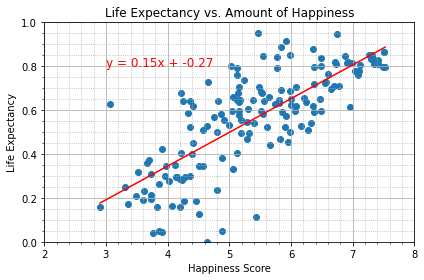

The r-squared is: 0.585813179396469


In [10]:
x_values = dropped_dup_merged_dfs["Happiness Score"]
y_values = dropped_dup_merged_dfs["Health (Life Expectancy)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Life Expectancy vs. Amount of Happiness')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,.8),fontsize=12,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Life Expectancy')
plt.ylim(0, 1)
plt.xlim(2, 8)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
print(f"The r-squared is: {rvalue**2}")

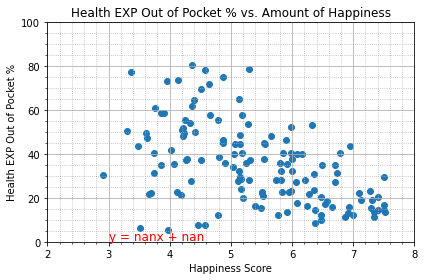

The r-squared is: nan


In [11]:
x_values = dropped_dup_merged_dfs["Happiness Score"]
y_values = dropped_dup_merged_dfs["Health EXP Out of Pocket %"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Health EXP Out of Pocket % vs. Amount of Happiness')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,.8),fontsize=12,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Health EXP Out of Pocket %')
plt.ylim(0, 100)
plt.xlim(2, 8)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [62]:
import gmaps
import gmaps.geojson_geometries
gmaps.configure(api_key='')

In [58]:
country_name = []
lat = []
lng = []

for country in dropped_dup_merged_dfs["Country"]:

    
    target_country = country

    params = {"address": target_country, "key": ''}

    # Build URL using the Google Maps API
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    # Run request
    response = requests.get(base_url, params=params)

#     # Convert to JSON
    country_geo = response.json()

#     # Extract lat/lng
    #country_loop = country_geo["results"][0]["address_components"][6]["long_name"]
    lat_loop = country_geo["results"][0]["geometry"]["location"]["lat"]
    lng_loop = country_geo["results"][0]["geometry"]["location"]["lng"]
    
    country_name.append(country_geo["results"][0]["address_components"][0]["long_name"])
    lat.append(country_geo["results"][0]["geometry"]["location"]["lat"])
    lng.append(country_geo["results"][0]["geometry"]["location"]["lng"])

    # Print results
    print(f"{target_country}: {lat_loop}, {lng_loop}")


Denmark: 56.26392, 9.501785
Switzerland: 46.818188, 8.227511999999999
Iceland: 64.963051, -19.020835
Norway: 60.47202399999999, 8.468945999999999
Finland: 61.92410999999999, 25.7481511
Canada: 56.130366, -106.346771
Netherlands: 52.132633, 5.291265999999999
New Zealand: -40.900557, 174.885971
Australia: -25.274398, 133.775136
Sweden: 60.12816100000001, 18.643501
Israel: 31.046051, 34.851612
Austria: 47.516231, 14.550072
United States: 37.09024, -95.712891
Costa Rica: 9.748916999999999, -83.753428
Puerto Rico: 18.220833, -66.590149
Germany: 51.165691, 10.451526
Brazil: -14.235004, -51.92528
Belgium: 50.503887, 4.469936
Ireland: 53.1423672, -7.692053599999999
Luxembourg: 49.815273, 6.129582999999999
Mexico: 23.634501, -102.552784
Singapore: 1.352083, 103.819836
United Kingdom: 55.378051, -3.435973
Chile: -35.675147, -71.542969
Panama: 8.537981, -80.782127
Argentina: -38.416097, -63.61667199999999
Czech Republic: 49.81749199999999, 15.472962
United Arab Emirates: 23.424076, 53.847818
Urug

In [59]:
len(country_name), len(lat), len(lng)

(157, 157, 157)

In [60]:
countries_dict = {
    "Country": country_name,
    "Lat": lat,
    "Lng": lng
}
geo_data = pd.DataFrame(countries_dict)
geo_data.head()


,Country,Lat,Lng
0,Denmark,56.263920,9.501785
1,Switzerland,46.818188,8.227512
2,Iceland,64.963051,-19.020835
3,Norway,60.472024,8.468946
4,Finland,61.924110,25.748151


In [64]:
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')

fig = gmaps.figure()

# gini_layer = gmaps.geojson_layer(countries_geojson)
# fig.add_layer(gini_layer)

locations = geo_data[["Lat", "Lng"]].astype(float)
happiness = dropped_dup_merged_dfs["Happiness Score"].astype(float)

heat_layer = gmaps.heatmap_layer(locations, weights=happiness, 
                                 dissipating=False, max_intensity=100,
                                  point_radius = 5)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
## top 10 and lower 10 happiness into dataframes

# top 5 are denmark, swietzerland, iceland, norway, finland (1-5)
top10happy = dropped_dup_merged_dfs.loc[(dropped_dup_merged_dfs ["Happiness Rank"] <=10)].replace(np.nan, 0)

#bottom 5 are benink, afghanistan, togo, syria, burnundi (153-157)
bottom10happy = dropped_dup_merged_dfs.loc[(dropped_dup_merged_dfs ["Happiness Rank"] >=148)].replace(np.nan, 0)


bottom10happy

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Health Expenditure Public %,Health EXP Out of Pocket %,Health Expenditure Per Capita($),Per Capita Expeniture by PPP,External Health Expenditure %,Physicians per 1000,Nurse Midwife per 1000,Specialist Surgical per 1000,Completeness of Birth Reg,Completeness of Death Reg
147,Madagascar,Sub-Saharan Africa,148,3.695,3.621,3.769,0.27954,0.46115,0.37109,0.13684,...,47.7,22.4,24.1,90.4,25.1,0.2,0.1,0.8,83.0,0.0
148,Tanzania,Sub-Saharan Africa,149,3.666,3.561,3.771,0.47155,0.77623,0.35700,0.31760,...,40.6,21.9,35.5,112.0,36.4,0.0,0.4,0.5,26.4,0.0
149,Liberia,Sub-Saharan Africa,150,3.622,3.463,3.781,0.10706,0.50353,0.23165,0.25748,...,14.2,47.3,68.3,133.1,30.1,0.0,0.1,0.6,24.6,0.0
150,Guinea,Sub-Saharan Africa,151,3.607,3.533,3.681,0.22415,0.31090,0.18829,0.30953,...,12.3,49.8,37.5,107.7,27.2,0.1,0.4,0.0,62.0,0.0
151,Rwanda,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,...,33.9,6.4,48.1,130.4,50.6,0.1,0.8,0.8,56.0,0.0
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,...,20.5,43.5,30.4,83.5,30.5,0.2,0.6,1.9,85.6,0.0
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,...,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,0.0
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,...,20.0,50.4,38.8,99.9,20.7,0.0,0.3,0.5,78.0,0.0
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,...,0.0,0.0,0.0,0.0,0.0,1.2,1.5,0.0,0.0,92.0
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,...,29.1,30.5,18.5,50.3,38.6,0.1,0.7,0.4,83.5,0.0


The correlation between both factors is -0.13


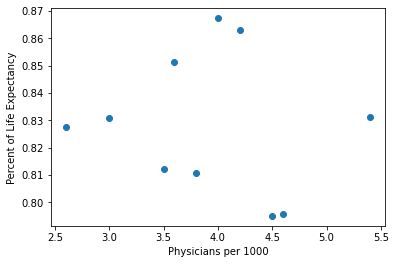

In [13]:
#statistical info
# Compare the calcualted Pearson's r to the plots
correlation = st.pearsonr(top10happy["Physicians per 1000"],top10happy["Health (Life Expectancy)"])
plt.scatter(top10happy["Physicians per 1000"],top10happy["Health (Life Expectancy)"])
plt.xlabel('Physicians per 1000')
plt.ylabel('Percent of Life Expectancy')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.24


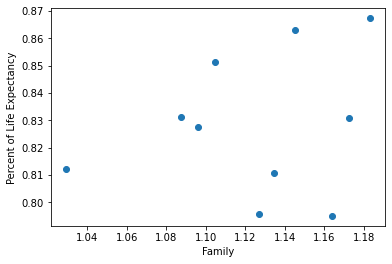

In [14]:
#statistical info
# Compare the calcualted Pearson's r to the plots
correlation = st.pearsonr(top10happy["Family"],top10happy["Health (Life Expectancy)"])
plt.scatter(top10happy["Family"],top10happy["Health (Life Expectancy)"])
plt.xlabel('Family')
plt.ylabel('Percent of Life Expectancy')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.45


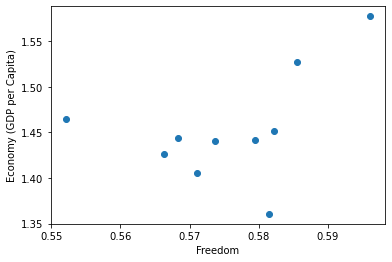

In [15]:
#statistical info
# Compare the calcualted Pearson's r to the plots
correlation = st.pearsonr(top10happy["Freedom"],top10happy["Economy (GDP per Capita)"])
plt.scatter(top10happy["Freedom"],top10happy["Economy (GDP per Capita)"])
plt.xlabel('Freedom')
plt.ylabel('Economy (GDP per Capita)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

##Interesting that freedom to GDP per capita increases

The correlation between both factors is 0.27


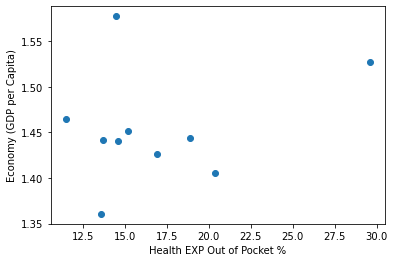

In [16]:

#statistical info
# Compare the calcualted Pearson's r to the plots
correlation = st.pearsonr(top10happy["Health EXP Out of Pocket %"],top10happy["Economy (GDP per Capita)"])
plt.scatter(top10happy["Health EXP Out of Pocket %"],top10happy["Economy (GDP per Capita)"])
plt.xlabel('Health EXP Out of Pocket %')
plt.ylabel('Economy (GDP per Capita)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.45


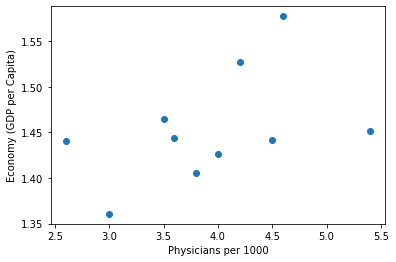

In [17]:
#statistical info
# Compare the calcualted Pearson's r to the plots
correlation = st.pearsonr(top10happy["Physicians per 1000"],top10happy["Economy (GDP per Capita)"])
plt.scatter(top10happy["Physicians per 1000"],top10happy["Economy (GDP per Capita)"])
plt.xlabel('Physicians per 1000')
plt.ylabel('Economy (GDP per Capita)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.32


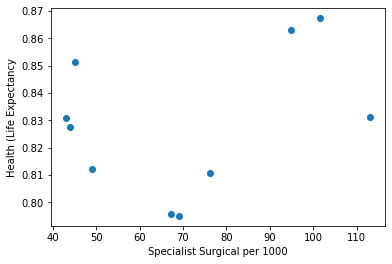

In [18]:
#statistical info
# Compare the calcualted Pearson's r to the plots
correlation = st.pearsonr(top10happy["Specialist Surgical per 1000"],top10happy["Health (Life Expectancy)"])
plt.scatter(top10happy["Specialist Surgical per 1000"],top10happy["Health (Life Expectancy)"])
plt.xlabel('Specialist Surgical per 1000')
plt.ylabel('Health (Life Expectancy')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.64


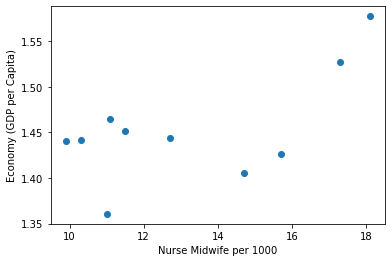

In [19]:
#statistical info
# Compare the calcualted Pearson's r to the plots
correlation = st.pearsonr(top10happy["Nurse Midwife per 1000"],top10happy["Economy (GDP per Capita)"])
plt.scatter(top10happy["Nurse Midwife per 1000"],top10happy["Economy (GDP per Capita)"])
plt.xlabel('Nurse Midwife per 1000')
plt.ylabel('Economy (GDP per Capita)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.24


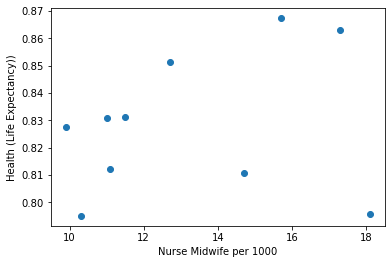

In [20]:
#statistical info
# Compare the calcualted Pearson's r to the plots
correlation = st.pearsonr(top10happy["Nurse Midwife per 1000"],top10happy["Health (Life Expectancy)"])
plt.scatter(top10happy["Nurse Midwife per 1000"],top10happy["Health (Life Expectancy)"])
plt.xlabel('Nurse Midwife per 1000')
plt.ylabel('Health (Life Expectancy))')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [21]:
#10 unique values for region
dropped_dup_merged_dfs['Region'].nunique()


    
# Determine outliers using upper and lower bounds
quartiles = dropped_dup_merged_dfs['Health Expenditure Public %'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Health Expenditure Public % is: {lowerq}")
print(f"The upper quartile of Health Expenditure Public %  is: {upperq}")
print(f"The interquartile of Health Expenditure Public %  is: {iqr}")
print(f"The the median of Health Expenditure Public % is: {quartiles[0.5]} ")

The lower quartile of Health Expenditure Public % is: 36.625
The upper quartile of Health Expenditure Public %  is: 69.625
The interquartile of Health Expenditure Public %  is: 33.0
The the median of Health Expenditure Public % is: 54.55 


In [12]:
# Drop rows with NaN values for the columns needed
happyhealth_clean_df = dropped_dup_merged_dfs.dropna(subset=['Happiness Score', 'Health (Life Expectancy)', 'Health Expenditure Public %', 'Health EXP Out of Pocket %', 'Health Expenditure Per Capita($)', 'Physicians per 1000', 'Economy (GDP per Capita)', 'Nurse Midwife per 1000', 'Specialist Surgical per 1000' ]).reset_index(drop= True)

happyhealth_clean_df

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Health Expenditure Public %,Health EXP Out of Pocket %,Health Expenditure Per Capita($),Per Capita Expeniture by PPP,External Health Expenditure %,Physicians per 1000,Nurse Midwife per 1000,Specialist Surgical per 1000,Completeness of Birth Reg,Completeness of Death Reg
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,...,84.1,13.7,5565.6,5093.0,NaN,4.5,10.3,69.0,100.0,98.0
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,...,62.8,29.6,9836.0,7867.4,NaN,4.2,17.3,94.8,100.0,100.0
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,...,81.5,16.9,5063.6,4245.1,0.0,4.0,15.7,101.6,100.0,100.0
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,...,85.1,14.5,7477.9,6203.5,0.0,4.6,18.1,67.2,100.0,100.0
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,...,77.4,20.4,4117.3,4112.1,0.0,3.8,14.7,76.3,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Rwanda,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,...,33.9,6.4,48.1,130.4,50.6,0.1,0.8,0.8,56.0,NaN
115,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,...,20.5,43.5,30.4,83.5,30.5,0.2,0.6,1.9,85.6,NaN
116,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,...,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
117,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,...,20.0,50.4,38.8,99.9,20.7,0.0,0.3,0.5,78.0,NaN


In [13]:
# Determine outliers using upper and lower bounds
quartiles = happyhealth_clean_df['Health (Life Expectancy)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Health (Life Expectancy) is: {lowerq}")
print(f"The upper quartile of Health (Life Expectancy)  is: {upperq}")
print(f"The interquartile of Health (Life Expectancy)  is: {iqr}")
print(f"The the median of Health (Life Expectancy) is: {quartiles[0.5]} ")

The lower quartile of Health (Life Expectancy) is: 0.437925
The upper quartile of Health (Life Expectancy)  is: 0.7328399999999999
The interquartile of Health (Life Expectancy)  is: 0.2949149999999999
The the median of Health (Life Expectancy) is: 0.62007 


In [16]:

# top 5 are denmark, swietzerland, iceland, norway, finland (1-5)
top_quartile_life = happyhealth_clean_df.loc[(happyhealth_clean_df ["Health (Life Expectancy)"] >=0.7328399999999999)]
#.replace(np.nan, 0)

#bottom 5 are benink, afghanistan, togo, syria, burnundi (153-157)
bottom_quartile_life = happyhealth_clean_df.loc[(happyhealth_clean_df ["Health (Life Expectancy)"] <=0.437925)]
#.replace(np.nan, 0)

top_quartile_life
bottom_quartile_life

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Health Expenditure Public %,Health EXP Out of Pocket %,Health Expenditure Per Capita($),Per Capita Expeniture by PPP,External Health Expenditure %,Physicians per 1000,Nurse Midwife per 1000,Specialist Surgical per 1000,Completeness of Birth Reg,Completeness of Death Reg
71,Pakistan,Southern Asia,92,5.132,5.038,5.226,0.68816,0.26135,0.40306,0.14622,...,27.9,65.2,39.6,144.1,4.1,1.0,0.5,5.5,42.2,NaN
77,Laos,Southeastern Asia,102,4.876,4.742,5.010,0.68042,0.54970,0.38291,0.52168,...,32.4,46.4,55.2,154.6,18.1,0.5,1.0,3.7,73.0,NaN
78,Nigeria,Sub-Saharan Africa,103,4.875,4.750,5.000,0.75216,0.64498,0.05108,0.27854,...,13.0,75.2,79.3,213.7,9.8,0.4,1.5,1.4,47.0,NaN
81,Zambia,Sub-Saharan Africa,106,4.795,4.645,4.945,0.61202,0.63760,0.23573,0.42662,...,38.3,12.1,56.5,175.2,42.5,0.1,0.9,1.5,11.3,NaN
86,Namibia,Sub-Saharan Africa,113,4.574,4.374,4.774,0.93287,0.70362,0.34745,0.48614,...,61.9,7.7,402.8,969.3,7.0,0.4,2.8,6.1,78.0,NaN
87,Cameroon,Sub-Saharan Africa,114,4.513,4.417,4.609,0.52497,0.62542,0.12698,0.42736,...,13.3,69.5,64.5,169.3,9.3,0.1,0.9,1.2,66.0,NaN
88,Ethiopia,Sub-Saharan Africa,115,4.508,4.425,4.591,0.29283,0.37932,0.34578,0.36703,...,27.6,37.4,27.5,69.5,15.3,0.1,0.8,0.5,2.7,NaN
89,South Africa,Sub-Saharan Africa,116,4.459,4.371,4.547,1.02416,0.96053,0.18611,0.42483,...,53.7,7.8,428.2,1071.3,1.9,0.9,3.5,11.4,89.0,91.0
94,Kenya,Sub-Saharan Africa,122,4.356,4.259,4.453,0.52267,0.76240,0.30147,0.40576,...,36.2,27.7,66.2,143.5,19.5,0.2,1.5,2.4,66.9,NaN
96,Congo (Kinshasa),Sub-Saharan Africa,125,4.272,4.191,4.353,0.05661,0.80676,0.18800,0.15602,...,12.3,37.4,20.5,34.5,43.4,0.1,0.5,0.2,24.6,NaN


The correlation between both factors is 0.54


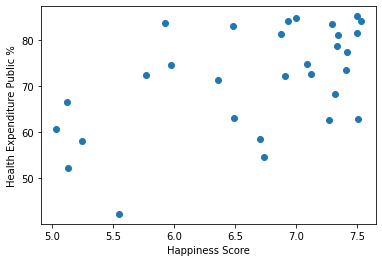

In [51]:
#statistical info
# Compare the calcualted Pearson's r to the plots
correlation = st.pearsonr(top_quartile_life["Happiness Score"],top_quartile_life["Health Expenditure Public %"])
plt.scatter(top_quartile_life["Happiness Score"],top_quartile_life["Health Expenditure Public %"])
plt.xlabel('Happiness Score')
plt.ylabel('Health Expenditure Public %')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.07


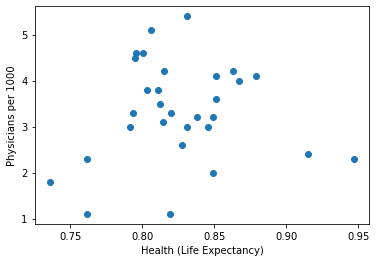

In [50]:
correlation = st.pearsonr(top_quartile_life["Health (Life Expectancy)"],top_quartile_life["Physicians per 1000"])
plt.scatter(top_quartile_life["Health (Life Expectancy)"],top_quartile_life["Physicians per 1000"])
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Physicians per 1000')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.02


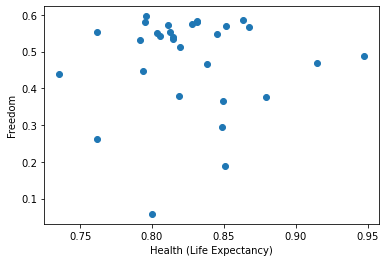

In [49]:
correlation = st.pearsonr(top_quartile_life["Health (Life Expectancy)"],top_quartile_life["Freedom"])
plt.scatter(top_quartile_life["Health (Life Expectancy)"],top_quartile_life["Freedom"])
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Freedom')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.1


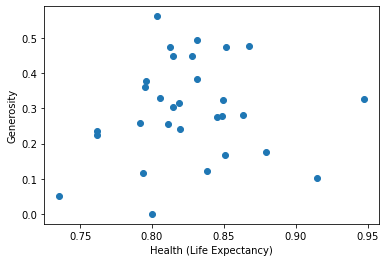

In [48]:
correlation = st.pearsonr(top_quartile_life["Health (Life Expectancy)"],top_quartile_life["Generosity"])
plt.scatter(top_quartile_life["Health (Life Expectancy)"],top_quartile_life["Generosity"])
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Generosity')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.27


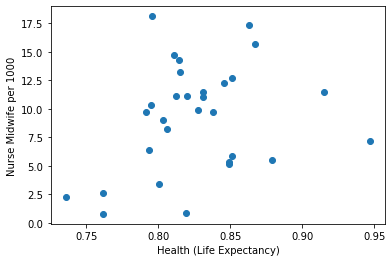

In [47]:

correlation = st.pearsonr(top_quartile_life["Health (Life Expectancy)"],top_quartile_life["Nurse Midwife per 1000"])
plt.scatter(top_quartile_life["Health (Life Expectancy)"],top_quartile_life["Nurse Midwife per 1000"])
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Nurse Midwife per 1000')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is -0.08


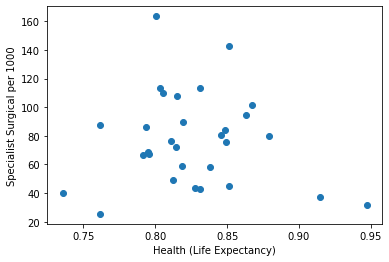

In [46]:
correlation = st.pearsonr(top_quartile_life["Health (Life Expectancy)"],top_quartile_life["Specialist Surgical per 1000"])
plt.scatter(top_quartile_life["Health (Life Expectancy)"],top_quartile_life["Specialist Surgical per 1000"])
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Specialist Surgical per 1000')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.71


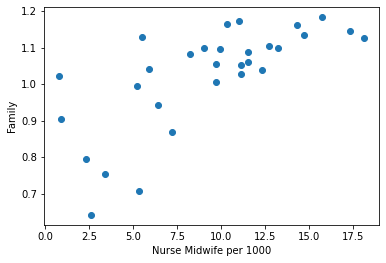

In [23]:
correlation = st.pearsonr(top_quartile_life["Nurse Midwife per 1000"],top_quartile_life["Family"])
plt.scatter(top_quartile_life["Nurse Midwife per 1000"],top_quartile_life["Family"])
plt.xlabel('Nurse Midwife per 1000')
plt.ylabel('Family')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.24


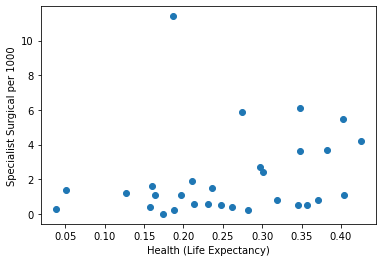

In [45]:
correlation = st.pearsonr(bottom_quartile_life["Health (Life Expectancy)"],bottom_quartile_life["Specialist Surgical per 1000"])
plt.scatter(bottom_quartile_life["Health (Life Expectancy)"],bottom_quartile_life["Specialist Surgical per 1000"])
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Specialist Surgical per 1000')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.22


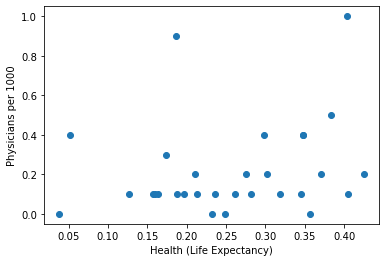

In [44]:
correlation = st.pearsonr(bottom_quartile_life["Health (Life Expectancy)"],bottom_quartile_life["Physicians per 1000"])
plt.scatter(bottom_quartile_life["Health (Life Expectancy)"],bottom_quartile_life["Physicians per 1000"])
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Physicians per 1000')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.05


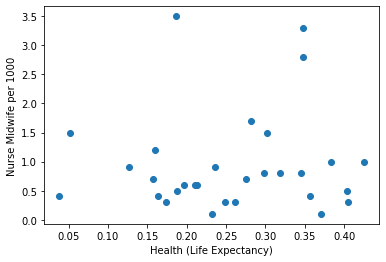

In [42]:
correlation = st.pearsonr(bottom_quartile_life["Health (Life Expectancy)"],bottom_quartile_life["Nurse Midwife per 1000"])
plt.scatter(bottom_quartile_life["Health (Life Expectancy)"],bottom_quartile_life["Nurse Midwife per 1000"])
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Nurse Midwife per 1000')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

C:\Users\mandi\anaconda3\envs\PythonData\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mandi\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'Label'
  cset = contour_func(
C:\Users\mandi\anaconda3\envs\PythonData\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mandi\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by 

Text(0, 0.5, 'Nurse Midwife per 1000')

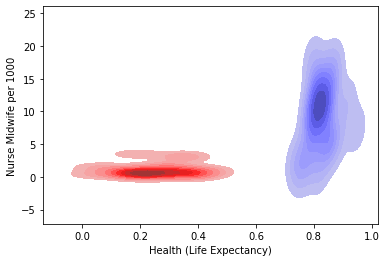

In [43]:

# Plotting the KDE Plot
sns.kdeplot(bottom_quartile_life["Health (Life Expectancy)"],bottom_quartile_life["Nurse Midwife per 1000"], color='r', shade=True, Label='Iris_Setosa')
  
sns.kdeplot(top_quartile_life["Health (Life Expectancy)"],top_quartile_life["Nurse Midwife per 1000"], color='b', shade=True, Label='Iris_Virginica')
  
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Nurse Midwife per 1000')

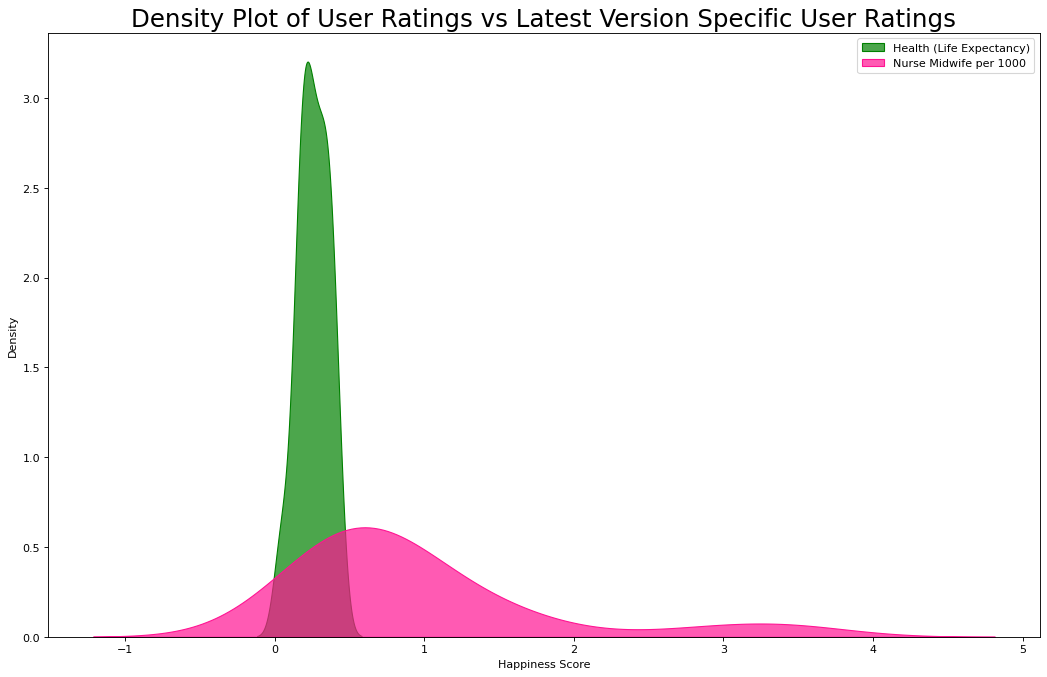

In [29]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(bottom_quartile_life["Health (Life Expectancy)"], shade=True, color="g", label="Health (Life Expectancy)", alpha=.7)
sns.kdeplot(bottom_quartile_life["Nurse Midwife per 1000"], shade=True, color="deeppink", label="Nurse Midwife per 1000", alpha=.7)
# Decoration
plt.title('Density Plot of User Ratings vs Latest Version Specific User Ratings', fontsize=22)
plt.xlabel('Happiness Score')
plt.legend()
plt.show()

In [30]:
bottom_quartile_life

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Health Expenditure Public %,Health EXP Out of Pocket %,Health Expenditure Per Capita($),Per Capita Expeniture by PPP,External Health Expenditure %,Physicians per 1000,Nurse Midwife per 1000,Specialist Surgical per 1000,Completeness of Birth Reg,Completeness of Death Reg
71,Pakistan,Southern Asia,92,5.132,5.038,5.226,0.68816,0.26135,0.40306,0.14622,...,27.9,65.2,39.6,144.1,4.1,1.0,0.5,5.5,42.2,NaN
77,Laos,Southeastern Asia,102,4.876,4.742,5.010,0.68042,0.54970,0.38291,0.52168,...,32.4,46.4,55.2,154.6,18.1,0.5,1.0,3.7,73.0,NaN
78,Nigeria,Sub-Saharan Africa,103,4.875,4.750,5.000,0.75216,0.64498,0.05108,0.27854,...,13.0,75.2,79.3,213.7,9.8,0.4,1.5,1.4,47.0,NaN
81,Zambia,Sub-Saharan Africa,106,4.795,4.645,4.945,0.61202,0.63760,0.23573,0.42662,...,38.3,12.1,56.5,175.2,42.5,0.1,0.9,1.5,11.3,NaN
86,Namibia,Sub-Saharan Africa,113,4.574,4.374,4.774,0.93287,0.70362,0.34745,0.48614,...,61.9,7.7,402.8,969.3,7.0,0.4,2.8,6.1,78.0,NaN
87,Cameroon,Sub-Saharan Africa,114,4.513,4.417,4.609,0.52497,0.62542,0.12698,0.42736,...,13.3,69.5,64.5,169.3,9.3,0.1,0.9,1.2,66.0,NaN
88,Ethiopia,Sub-Saharan Africa,115,4.508,4.425,4.591,0.29283,0.37932,0.34578,0.36703,...,27.6,37.4,27.5,69.5,15.3,0.1,0.8,0.5,2.7,NaN
89,South Africa,Sub-Saharan Africa,116,4.459,4.371,4.547,1.02416,0.96053,0.18611,0.42483,...,53.7,7.8,428.2,1071.3,1.9,0.9,3.5,11.4,89.0,91.0
94,Kenya,Sub-Saharan Africa,122,4.356,4.259,4.453,0.52267,0.76240,0.30147,0.40576,...,36.2,27.7,66.2,143.5,19.5,0.2,1.5,2.4,66.9,NaN
96,Congo (Kinshasa),Sub-Saharan Africa,125,4.272,4.191,4.353,0.05661,0.80676,0.18800,0.15602,...,12.3,37.4,20.5,34.5,43.4,0.1,0.5,0.2,24.6,NaN


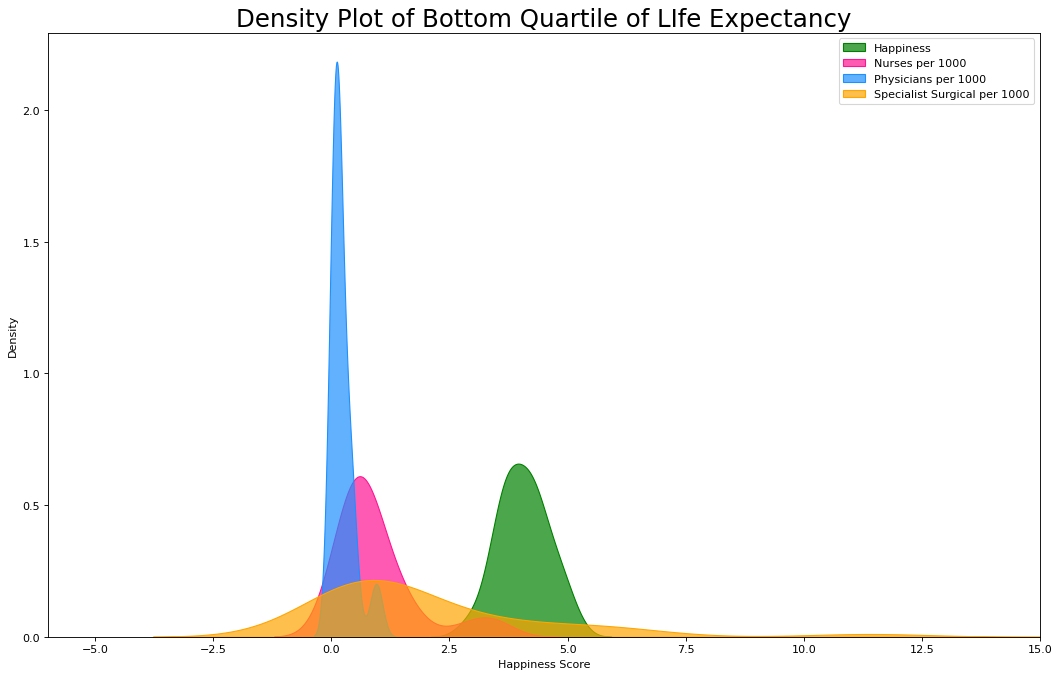

In [32]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.xlim(-6, 15)
sns.kdeplot(bottom_quartile_life["Happiness Score"], shade=True, color="g", label="Happiness", alpha=.7)
sns.kdeplot(bottom_quartile_life["Nurse Midwife per 1000"], shade=True, color="deeppink", label="Nurses per 1000", alpha=.7)
sns.kdeplot(bottom_quartile_life["Physicians per 1000"], shade=True, color="dodgerblue", label="Physicians per 1000", alpha=.7)
sns.kdeplot(bottom_quartile_life["Specialist Surgical per 1000"], shade=True, color="orange", label="Specialist Surgical per 1000", alpha=.7)

# Decoration
plt.title('Density Plot of Bottom Quartile of LIfe Expectancy', fontsize=22)
plt.legend()
plt.show()

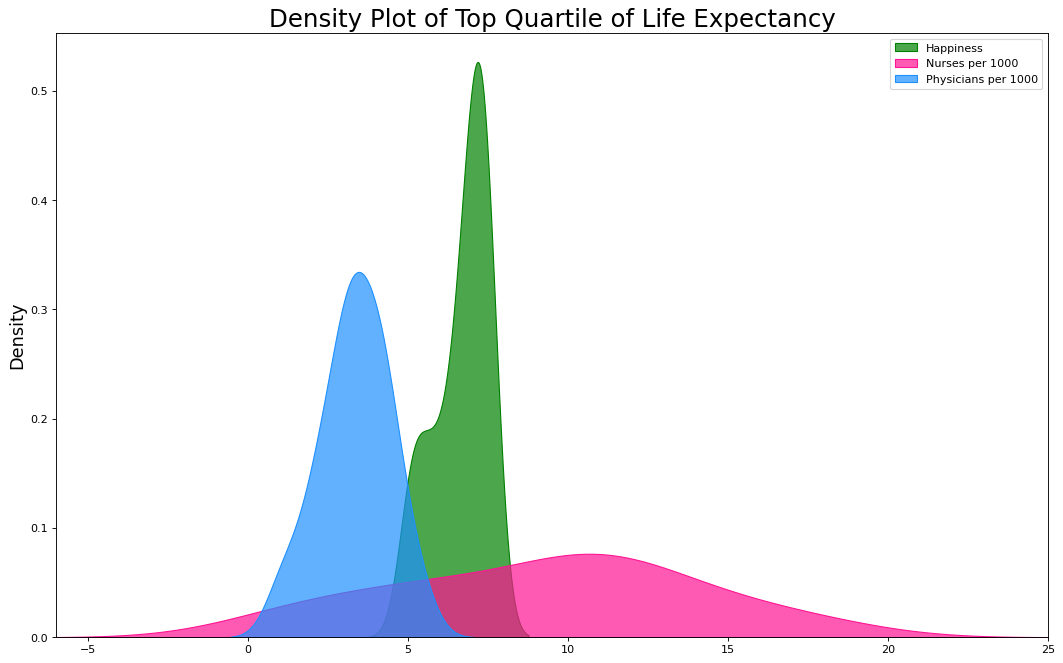

In [33]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.xlim(-6, 25)
sns.kdeplot(top_quartile_life["Happiness Score"], shade=True, color="g", label="Happiness", alpha=.7)
sns.kdeplot(top_quartile_life["Nurse Midwife per 1000"], shade=True, color="deeppink", label="Nurses per 1000", alpha=.7)
sns.kdeplot(top_quartile_life["Physicians per 1000"], shade=True, color="dodgerblue", label="Physicians per 1000", alpha=.7)
#sns.kdeplot(top_quartile_life["Specialist Surgical per 1000"], shade=True, color="orange", label="Specialist Surgical per 1000", alpha=.7)

# Decoration
plt.title('Density Plot of Top Quartile of Life Expectancy', fontsize=22)
plt.xlabel('', fontsize=18)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.show()

In [174]:
dropped_dup_merged_dfs.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,Health Expenditure Public %,Health EXP Out of Pocket %,Health Expenditure Per Capita($),Per Capita Expeniture by PPP,External Health Expenditure %,Physicians per 1000,Nurse Midwife per 1000,Specialist Surgical per 1000,Completeness of Birth Reg,Completeness of Death Reg
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,...,134.000000,134.000000,134.000000,134.000000,119.000000,136.000000,136.000000,122.000000,122.000000,85.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,...,52.090299,34.925373,1110.798507,1510.117910,6.725210,1.826471,4.338971,41.187705,85.500820,88.518824
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,...,21.393558,18.207945,1758.468717,1685.631164,11.554302,1.486345,4.178165,40.643234,23.502131,19.751019
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.100000,5.200000,18.500000,34.500000,0.000000,0.000000,0.100000,0.000000,2.700000,4.000000
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,...,36.625000,20.475000,91.950000,246.950000,0.100000,0.400000,1.000000,3.700000,80.025000,87.000000
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,...,54.550000,33.300000,333.800000,892.250000,1.100000,1.600000,2.600000,31.200000,98.200000,99.000000
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,...,69.625000,46.375000,1135.325000,1985.350000,6.850000,3.000000,6.525000,67.600000,100.000000,100.000000
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,...,85.100000,80.600000,9836.000000,7867.400000,50.600000,5.400000,18.100000,163.500000,100.000000,100.000000


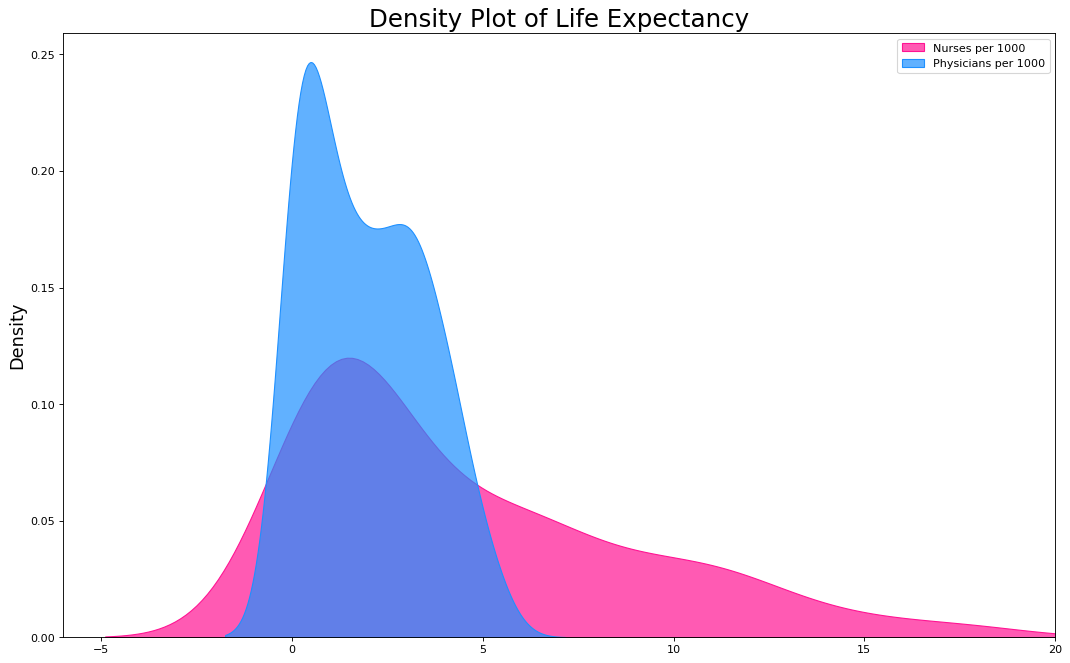

In [34]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.xlim(-6, 20)
#sns.kdeplot(dropped_dup_merged_dfs["Happiness Score"], shade=True, color="g", label="Happiness", alpha=.7)
sns.kdeplot(happyhealth_clean_df["Nurse Midwife per 1000"], shade=True, color="deeppink", label="Nurses per 1000", alpha=.7)
sns.kdeplot(happyhealth_clean_df["Physicians per 1000"], shade=True, color="dodgerblue", label="Physicians per 1000", alpha=.7)
#sns.kdeplot(dropped_dup_merged_dfs["Specialist Surgical per 1000"], shade=True, color="orange", label="Specialist Surgical per 1000", alpha=.7)

# Decoration
plt.title('Density Plot of Life Expectancy', fontsize=22)
plt.xlabel('', fontsize=18)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.show()

#both of these are right skewed If a density curve is right skewed, then the mean is greater than the median

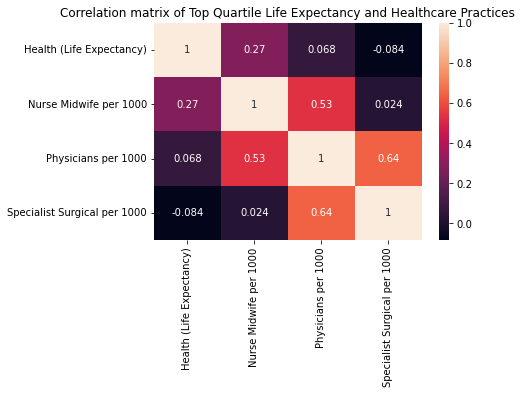

In [35]:
#life_exp = dropped_dup_merged_dfs.groupby("Health (Life Expectancy)")
correlation_mat = top_quartile_life[["Health (Life Expectancy)","Nurse Midwife per 1000","Physicians per 1000", "Specialist Surgical per 1000"]].corr()

sns.heatmap(correlation_mat, annot = True)
#plt.figure(figsize=(82944,51840))
plt.title("Correlation matrix of Top Quartile Life Expectancy and Healthcare Practices")
plt.show()

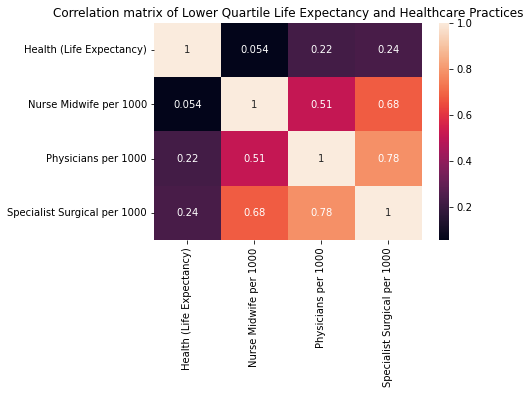

In [36]:
#life_exp = dropped_dup_merged_dfs.groupby("Health (Life Expectancy)")
correlation_mat = bottom_quartile_life[["Health (Life Expectancy)","Nurse Midwife per 1000","Physicians per 1000", "Specialist Surgical per 1000"]].corr()

sns.heatmap(correlation_mat, annot = True)
#plt.figure(figsize=(82944,51840))
plt.title("Correlation matrix of Lower Quartile Life Expectancy and Healthcare Practices")
plt.show()

Text(0.5, 1.0, 'Upper and Lower Quartiles of Life Expectancy vs Economy')

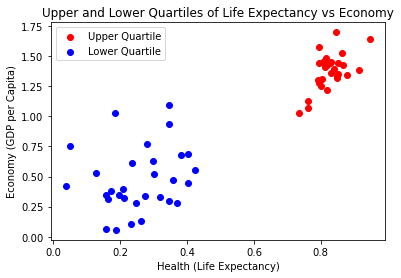

In [37]:
ax =plt.gca()
                                                                                       
ax.scatter(top_quartile_life["Health (Life Expectancy)"],top_quartile_life["Economy (GDP per Capita)"], color = "r", label = "Upper Quartile")
ax.scatter(bottom_quartile_life["Health (Life Expectancy)"], bottom_quartile_life["Economy (GDP per Capita)"], color= "b", label = "Lower Quartile")
# Put the legend out of the figure
ax.legend(loc='best')
  
# Put the legend out of the figure
plt.xlabel("Health (Life Expectancy)")
plt.ylabel("Economy (GDP per Capita)")
plt.title("Upper and Lower Quartiles of Life Expectancy vs Economy")


Text(0.5, 1.0, 'Upper and Lower Quartiles of Life Expectancy vs Physicians per 1000')

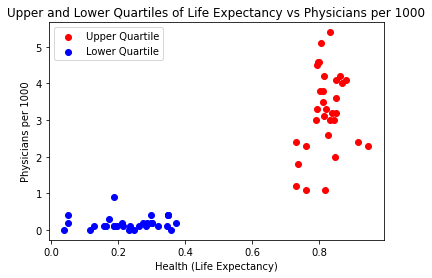

In [179]:
ax =plt.gca()
                                                                                        
ax.scatter(top_quartile_life["Health (Life Expectancy)"],top_quartile_life["Physicians per 1000"], color = "r", label = "Upper Quartile")
ax.scatter(bottom_quartile_life["Health (Life Expectancy)"], bottom_quartile_life["Physicians per 1000"], color= "b", label = "Lower Quartile")
# Put the legend out of the figure
ax.legend(loc='best')
  
# Put the legend out of the figure
plt.xlabel("Health (Life Expectancy)")
plt.ylabel("Physicians per 1000")
plt.title("Upper and Lower Quartiles of Life Expectancy vs Physicians per 1000")

Text(0.5, 1.0, 'Upper and Lower Quartiles of Life Expectancy vs Nurse/Midwife per 1000')

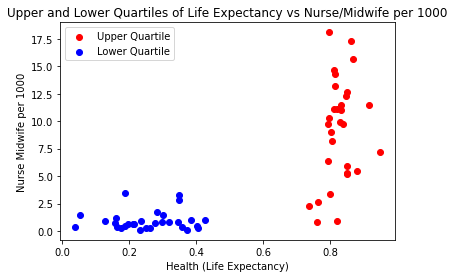

In [38]:
ax =plt.gca()
                                                                                        
ax.scatter(top_quartile_life["Health (Life Expectancy)"],top_quartile_life["Nurse Midwife per 1000"], color = "r", label = "Upper Quartile")
ax.scatter(bottom_quartile_life["Health (Life Expectancy)"], bottom_quartile_life["Nurse Midwife per 1000"], color= "b", label = "Lower Quartile")
# Put the legend out of the figure
ax.legend(loc='best')
  
# Put the legend out of the figure
plt.xlabel("Health (Life Expectancy)")
plt.ylabel("Nurse Midwife per 1000")
plt.title("Upper and Lower Quartiles of Life Expectancy vs Nurse/Midwife per 1000")